In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error



In [3]:
file = pd.read_csv("dataset/train_data.csv")


In [5]:
file2 = pd.read_csv("dataset/test_data.csv")

In [7]:
file3 = pd.read_csv("dataset/sample_submission.csv")


In [8]:
file.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


In [9]:
file2.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [10]:
file3.head()

,Date,Prediction
0,1/1/2019,100
1,1/2/2019,100
2,1/3/2019,100
3,1/4/2019,100
4,1/5/2019,100


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [12]:
file = file.rename(columns = {"Date":"date","Petrol (USD)":"petrol"})

In [13]:
file.isnull().sum()

date      0
petrol    2
dtype: int64

In [14]:
file = file

In [15]:
file.isna().sum()

date      0
petrol    2
dtype: int64

In [16]:
# Find indices with missing values in 'petrol usd'
missing_indices = file[file['petrol'].isna()].index

print("Indices with missing values:", missing_indices)


Indices with missing values: Index([125, 180], dtype='int64')


In [17]:
file['petrol'] = file['petrol'].interpolate(method = 'linear')

In [18]:
file.isna().sum()

date      0
petrol    0
dtype: int64

In [19]:
file.describe(include ="all")

,date,petrol
count,813,813.000000
unique,813,NaN
top,6/9/2003,NaN
freq,1,NaN
mean,NaN,110.278561
std,NaN,19.246823
min,NaN,74.210000
25%,NaN,94.410000
50%,NaN,112.370000
75%,NaN,128.550000


In [20]:
file.duplicated().sum()

0

In [21]:
file.shape

(813, 2)

In [22]:
file.nunique()

date      813
petrol    756
dtype: int64

In [23]:
file.head()

,date,petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [24]:
file['date'] = pd.to_datetime(file['date'])

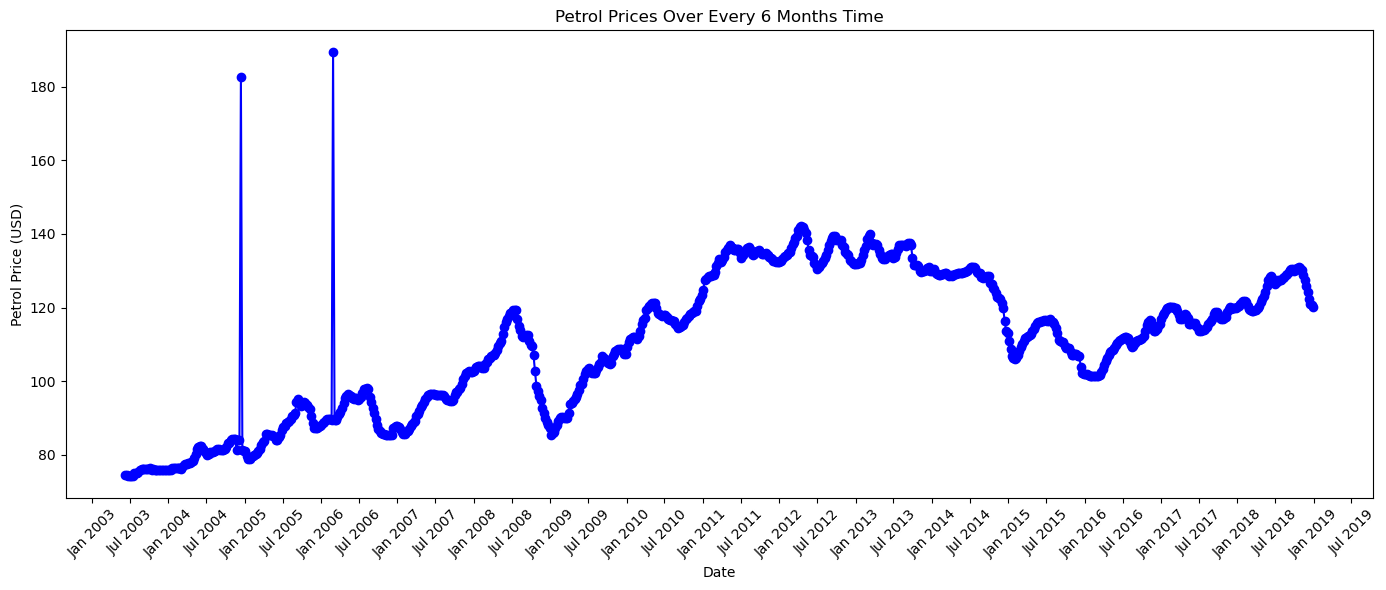

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(file['date'], file['petrol'], marker='o', linestyle='-', color='b')
locator = mdates.MonthLocator(interval=6)  # Show every 6 months
formatter = mdates.DateFormatter('%b %Y')  # Format date as 'Month Year'
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.title('Petrol Prices Over Every 6 Months Time')
plt.tight_layout()
plt.show()


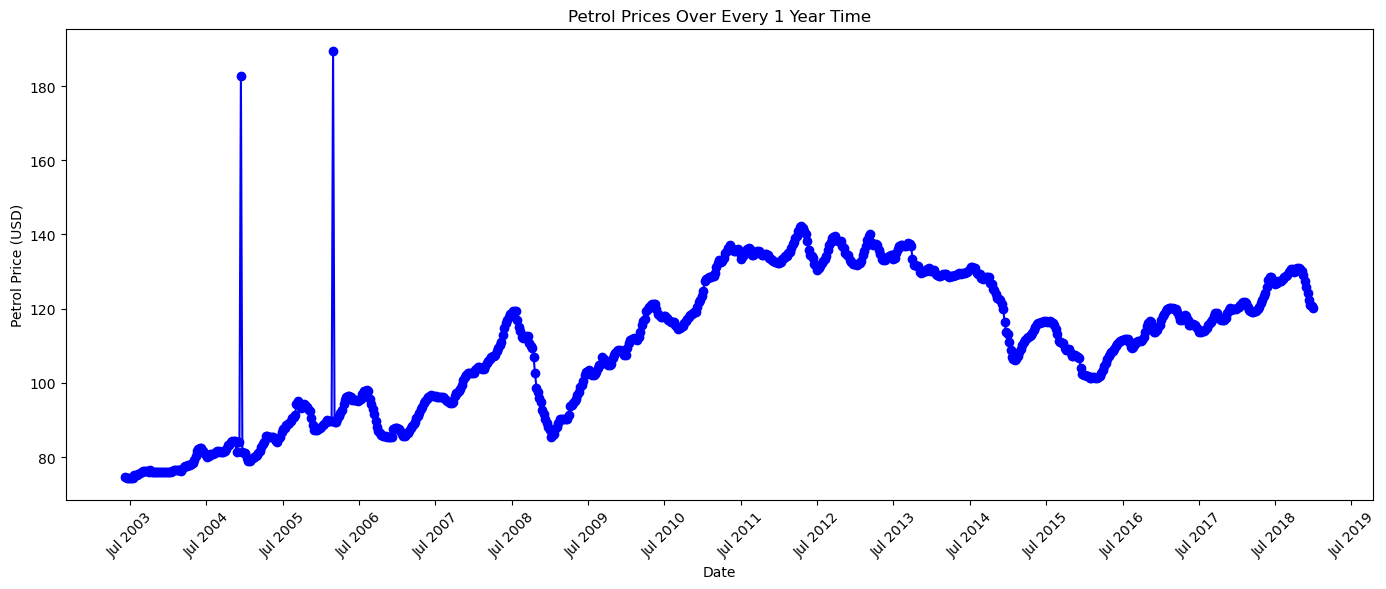

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(file['date'], file['petrol'], marker='o', linestyle='-', color='b')
locator = mdates.MonthLocator(interval=12)  # Show every 6 months
formatter = mdates.DateFormatter('%b %Y')  # Format date as 'Month Year'
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.title('Petrol Prices Over Every 1 Year Time')
plt.tight_layout()
plt.show()

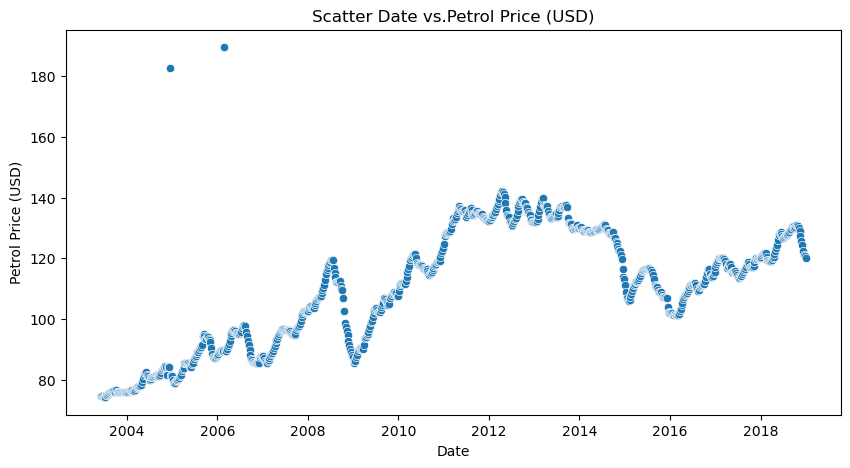

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=file, x='date', y='petrol')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.title('Scatter Date vs.Petrol Price (USD)')
plt.show()

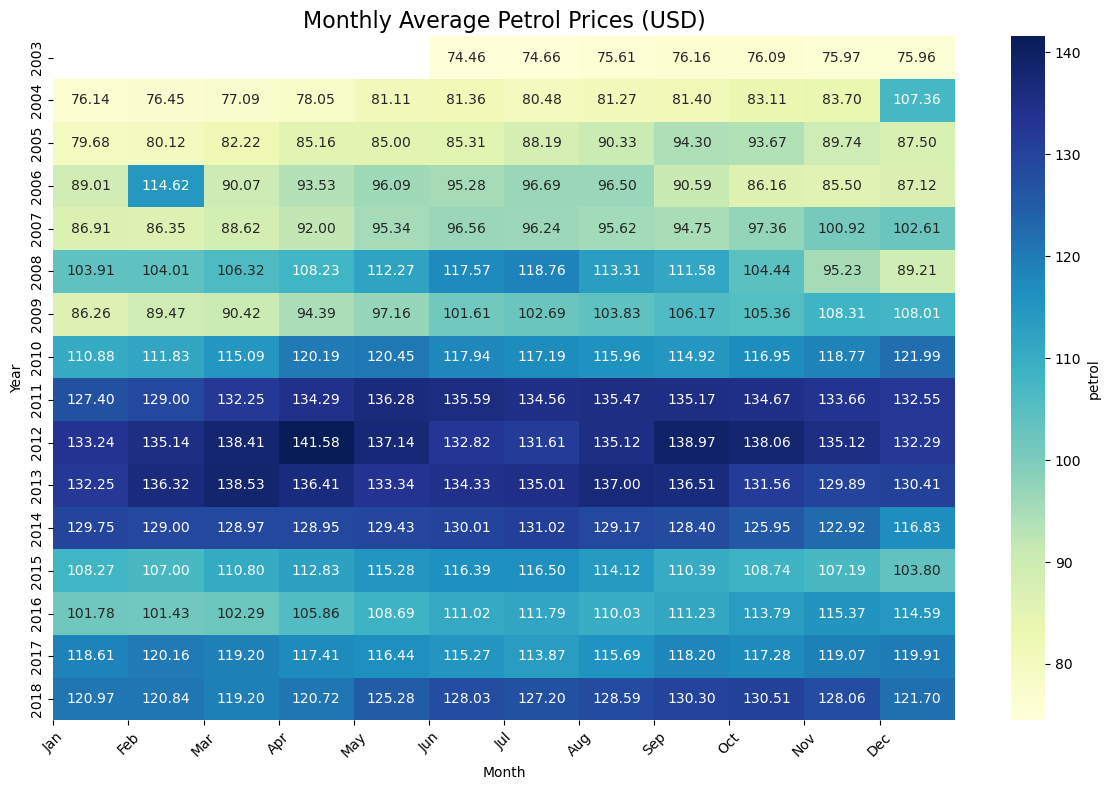

In [28]:
# Extract year and month for aggregation
file['Year'] = file['date'].dt.year
file['Month'] = file['date'].dt.month

# Create a pivot table for Year-Month aggregation
heatmap_data = file.pivot_table(
    index='Year', columns='Month', values='petrol', aggfunc='mean'
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'petrol'})

# Adding labels and title
plt.title('Monthly Average Petrol Prices (USD)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

plt.tight_layout()
plt.show()


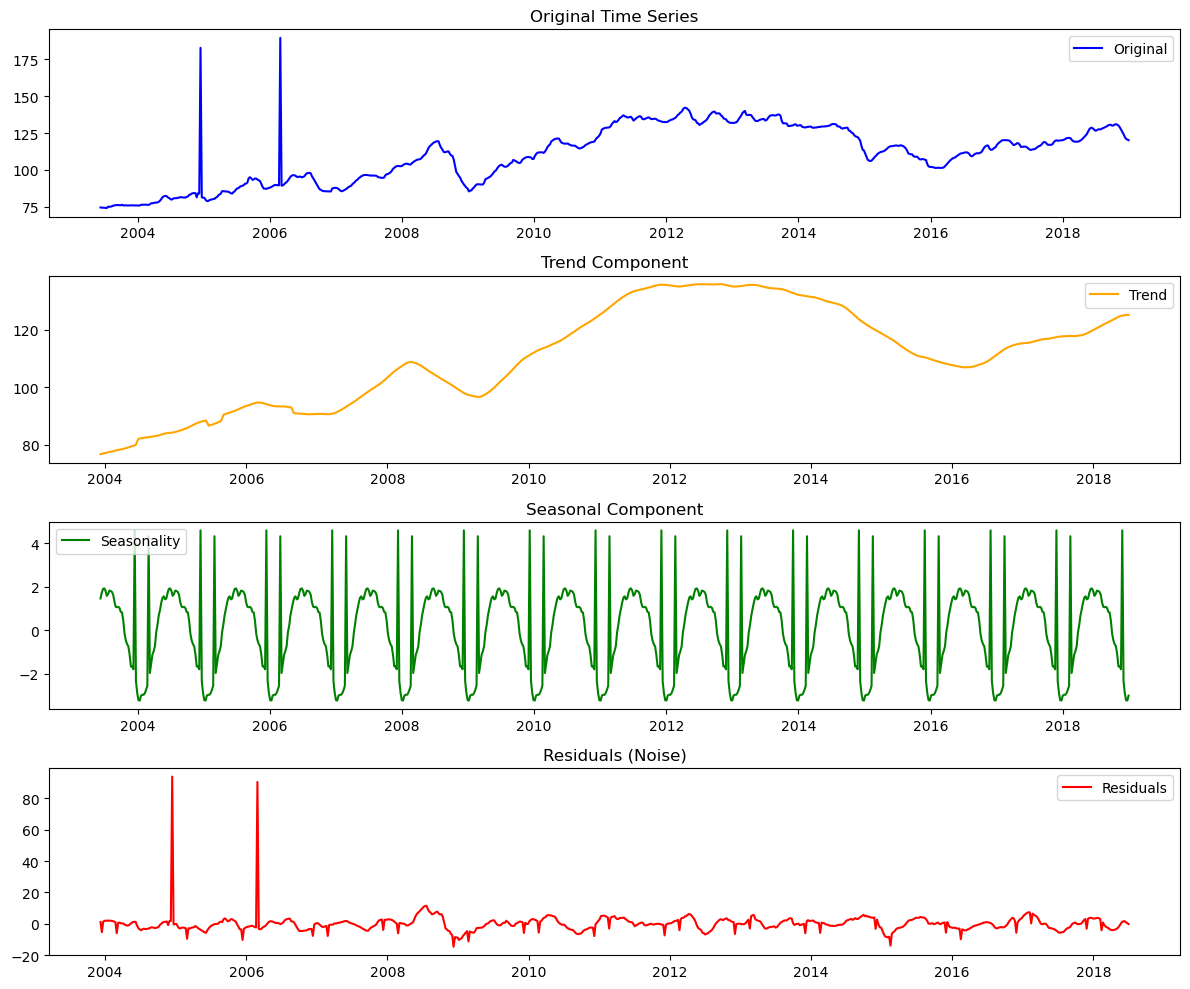

In [29]:

from statsmodels.tsa.seasonal import seasonal_decompose

file.set_index('date', inplace=True)  # Set Date as the index for time series analysis

# Perform Seasonal Decomposition
result = seasonal_decompose(file['petrol'], model='additive', period=52)  # Weekly data, so period=52

# Plot the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(file['petrol'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()


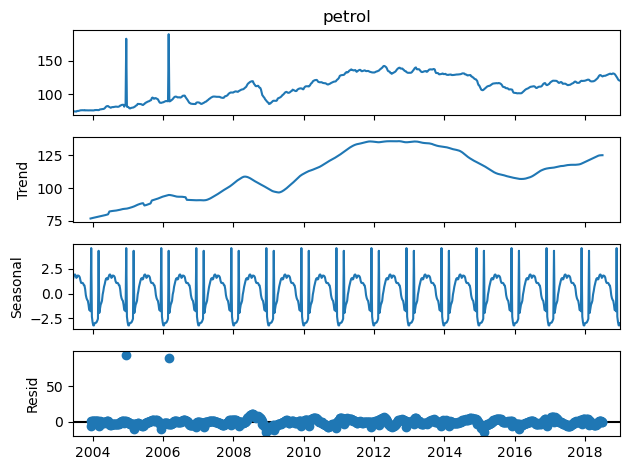

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(file['petrol'], model='additive', period=52)  # Adjust 'period' if not weekly
result.plot()
plt.show()


In [31]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(file['petrol'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -2.0399407671277046
p-value: 0.2693395700464495
The data is not stationary.


In [32]:
file['diff_petrol'] = file['petrol'].diff().dropna()

In [33]:

adf_test = adfuller(file['petrol'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -2.0399407671277046
p-value: 0.2693395700464495
The data is not stationary.


In [34]:
file['diff_petrol'] = file['petrol'].diff()
file = file.dropna()  # Remove NaN from the first row after differencing


In [35]:
file['log_petrol'] = np.log(file['petrol'])

In [36]:
file['log_diff_petrol'] = file['log_petrol'].diff().dropna()


22:09:14 - cmdstanpy - INFO - Chain [1] start processing
22:09:15 - cmdstanpy - INFO - Chain [1] done processing


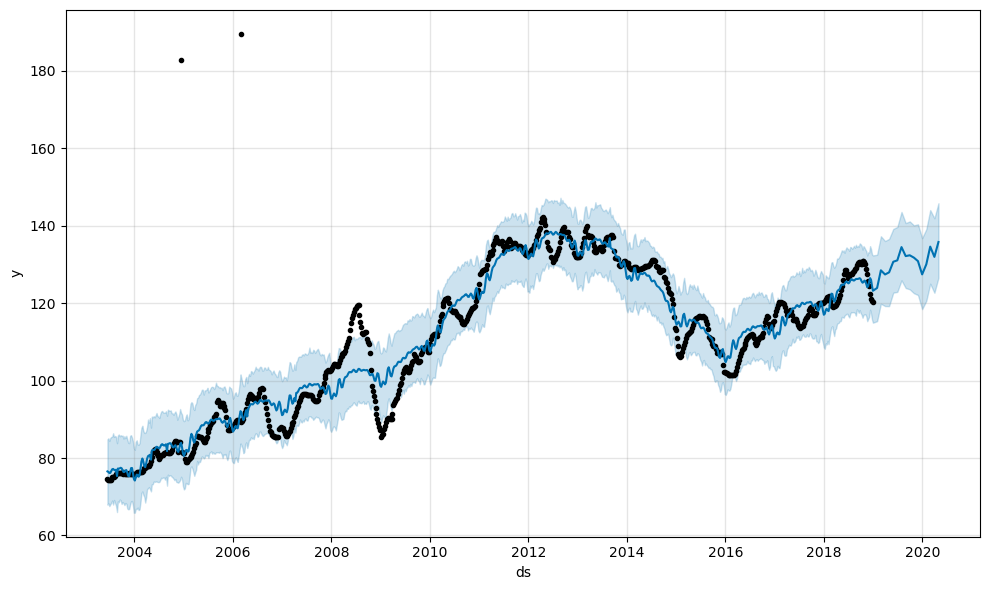

In [37]:
from prophet import Prophet

file_prophet = file.reset_index()
file_prophet.rename(columns={'date': 'ds', 'petrol': 'y'}, inplace=True)

model = Prophet()
model.fit(file_prophet)
future = model.make_future_dataframe(periods=16, freq='ME')
forecast = model.predict(future)
model.plot(forecast)


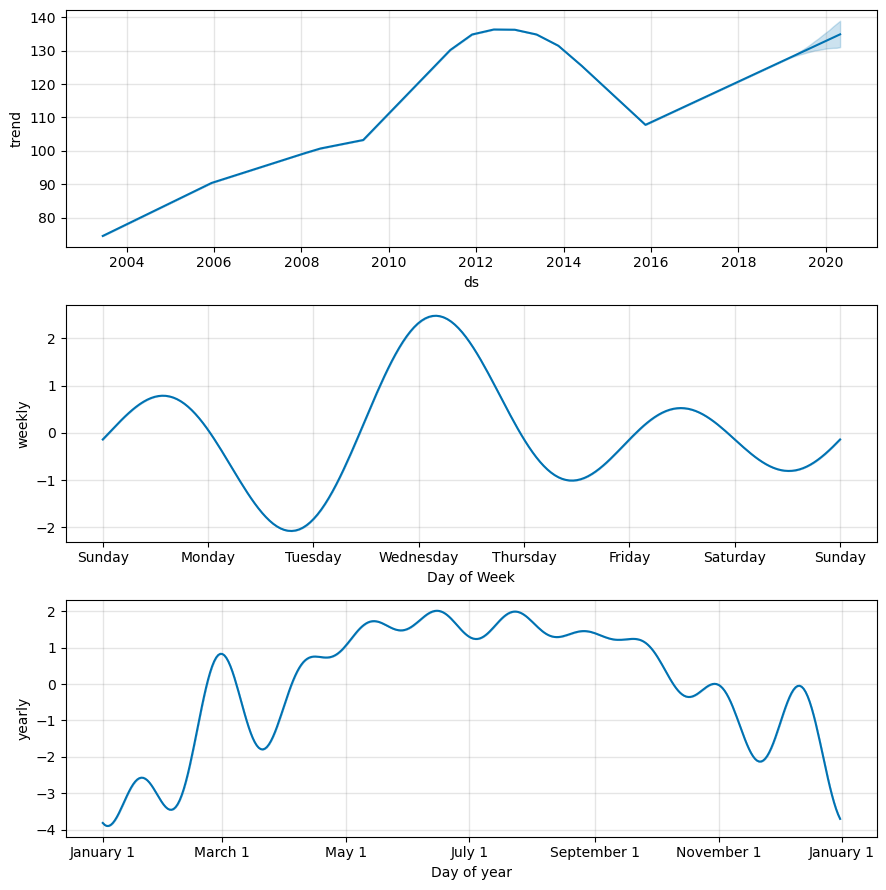

In [38]:
# Plot the forecast components
model.plot_components(forecast)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split into train and test
train = file_prophet.iloc[:-16]
test = file_prophet.iloc[-16:]

# Train the model on training data
model = Prophet()
model.fit(train)

# Predict for test data
future_test = model.make_future_dataframe(periods=16, freq='ME')
forecast_test = model.predict(future_test)

# Evaluate the forecast against actual values
forecast_values = forecast_test[-16:]['yhat'].values
actual_values = test['y'].values

mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


22:09:19 - cmdstanpy - INFO - Chain [1] start processing
22:09:20 - cmdstanpy - INFO - Chain [1] done processing


MAE: 5.583306860028536
RMSE: 6.039822589822408


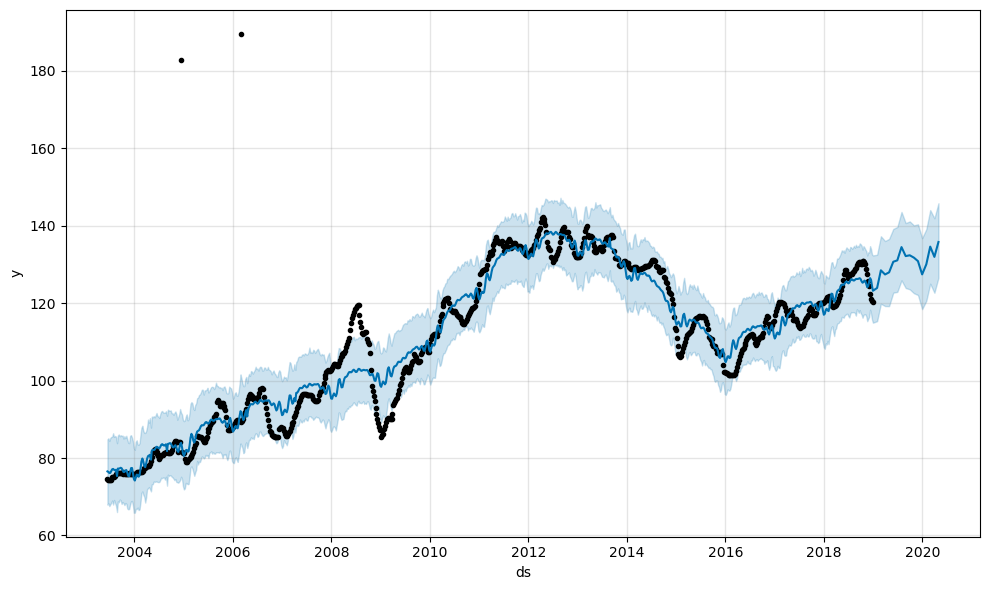

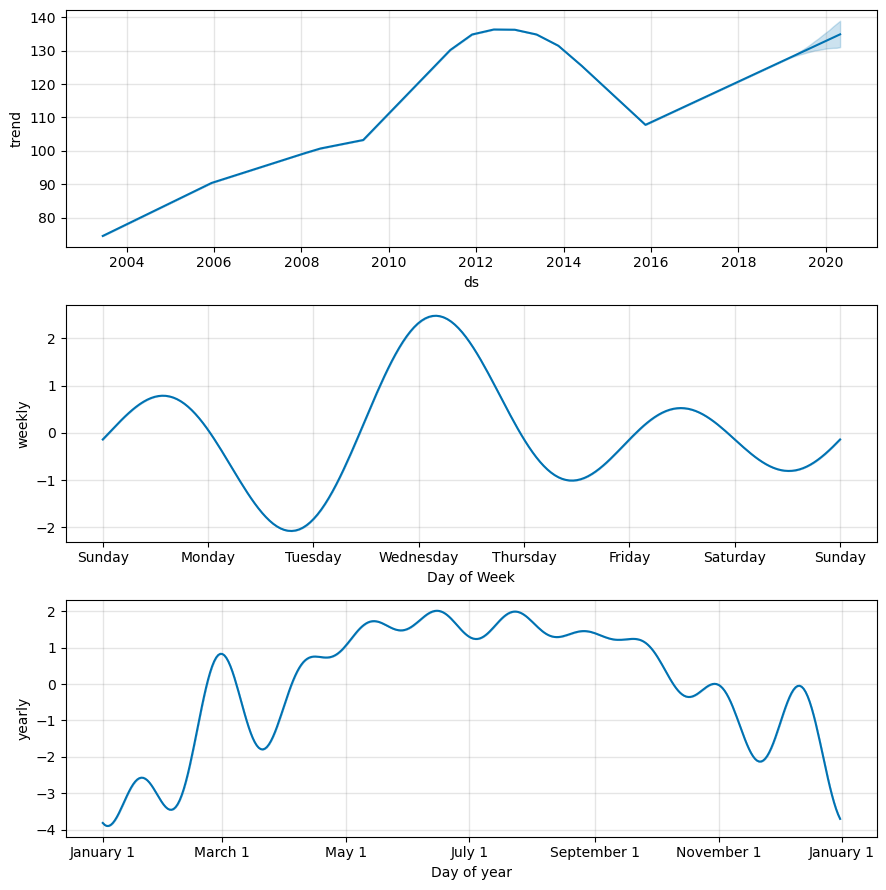

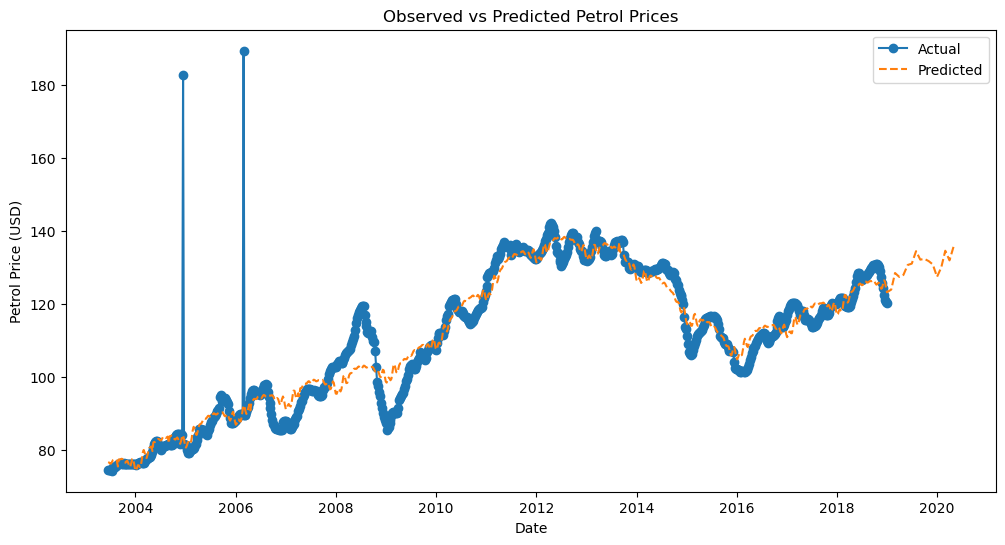

In [40]:
import matplotlib.pyplot as plt

# Plot observed vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(file_prophet['ds'], file_prophet['y'], label='Actual', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', linestyle='--')
plt.title('Observed vs Predicted Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.legend()
plt.show()


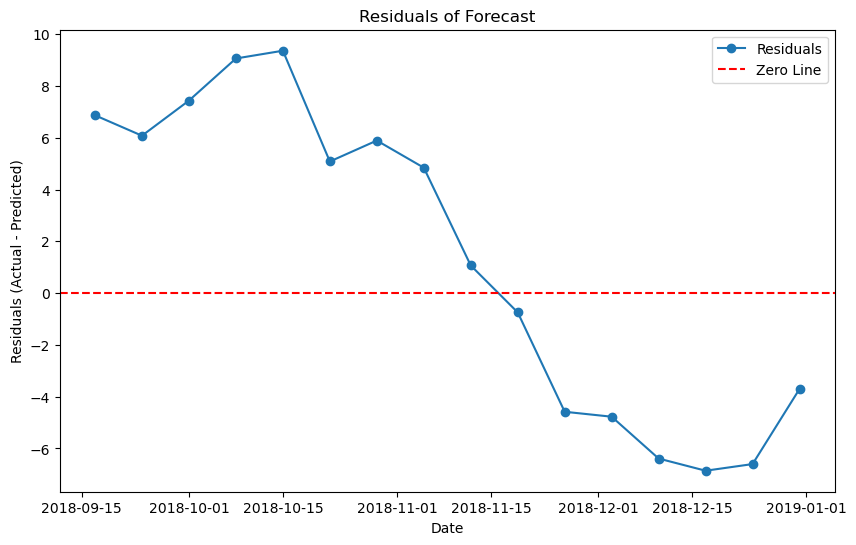

In [41]:
residuals = actual_values - forecast_values

plt.figure(figsize=(10, 6))
plt.plot(test['ds'], residuals, marker='o', linestyle='-', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals of Forecast')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


In [42]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'mae', 'rmse', 'mape']])


  0%|          | 0/25 [00:00<?, ?it/s]

22:09:23 - cmdstanpy - INFO - Chain [1] start processing
22:09:23 - cmdstanpy - INFO - Chain [1] done processing
22:09:24 - cmdstanpy - INFO - Chain [1] start processing
22:09:24 - cmdstanpy - INFO - Chain [1] done processing
22:09:24 - cmdstanpy - INFO - Chain [1] start processing
22:09:25 - cmdstanpy - INFO - Chain [1] done processing
22:09:25 - cmdstanpy - INFO - Chain [1] start processing
22:09:25 - cmdstanpy - INFO - Chain [1] done processing
22:09:25 - cmdstanpy - INFO - Chain [1] start processing
22:09:26 - cmdstanpy - INFO - Chain [1] done processing
22:09:26 - cmdstanpy - INFO - Chain [1] start processing
22:09:26 - cmdstanpy - INFO - Chain [1] done processing
22:09:27 - cmdstanpy - INFO - Chain [1] start processing
22:09:27 - cmdstanpy - INFO - Chain [1] done processing
22:09:27 - cmdstanpy - INFO - Chain [1] start processing
22:09:28 - cmdstanpy - INFO - Chain [1] done processing
22:09:28 - cmdstanpy - INFO - Chain [1] start processing
22:09:28 - cmdstanpy - INFO - Chain [1]

     horizon        mae       rmse      mape
0    37 days   7.120228   8.802245  0.065763
1    38 days   7.119841   8.796642  0.065681
2    39 days   7.317170   8.981288  0.067342
3    40 days   7.352208   9.013672  0.067622
4    41 days   7.556683   9.231460  0.069703
..       ...        ...        ...       ...
324 361 days  15.723606  17.091443  0.136321
325 362 days  15.648498  17.027874  0.135921
326 363 days  15.627767  17.047196  0.135297
327 364 days  15.609157  17.021239  0.135085
328 365 days  15.717789  17.118104  0.136054

[329 rows x 4 columns]


In [43]:
# Generate future dates
future = model.make_future_dataframe(periods=16, freq='M')  # 16 months
forecast = model.predict(future)

# Export the forecast to a CSV file
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('petrol_price_forecast.csv', index=False)

# Display the last few rows of the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(16))


C:\Users\armaa\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


            ds        yhat  yhat_lower  yhat_upper
796 2018-09-30  123.722706  114.920695  132.795854
797 2018-10-31  124.511518  115.901992  133.136191
798 2018-11-30  122.545273  114.076561  130.546691
799 2018-12-31  121.089178  112.210663  129.448609
800 2019-01-31  121.449649  113.161104  130.497950
801 2019-02-28  125.897236  117.034581  134.460002
802 2019-03-31  124.748333  116.682125  133.745341
803 2019-04-30  125.266454  116.428003  134.363481
804 2019-05-31  127.872868  118.916459  136.688667
805 2019-06-30  128.144720  118.737216  136.881809
806 2019-07-31  130.351836  121.036235  139.673949
807 2019-08-31  129.072390  119.956189  138.652607
808 2019-09-30  128.757801  119.341900  138.233983
809 2019-10-31  127.878191  118.534695  137.524573
810 2019-11-30  127.211340  117.475446  136.710133
811 2019-12-31  123.879847  113.391976  134.717433


In [44]:
print(forecast.head(5))
print(file.head(5))


          ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2003-06-16  74.101253   68.441407   84.839144    74.101253    74.101253   
1 2003-06-23  74.223541   67.682379   85.058027    74.223541    74.223541   
2 2003-06-30  74.345830   68.125531   85.581254    74.345830    74.345830   
3 2003-07-07  74.468118   66.940130   84.946400    74.468118    74.468118   
4 2003-07-14  74.590407   68.290955   84.413932    74.590407    74.590407   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        2.445306              2.445306              2.445306  0.303225   
1        2.197784              2.197784              2.197784  0.303225   
2        1.777374              1.777374              1.777374  0.303225   
3        1.687427              1.687427              1.687427  0.303225   
4        2.039176              2.039176              2.039176  0.303225   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.303225

In [45]:
# Reset index in `file` to merge on dates
file.reset_index(inplace=True)

# Merge actual (`file`) and forecasted (`forecast`) data
combined = pd.merge(file, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], how='inner', left_on='date', right_on='ds')

# Check combined data
print(combined.head())


        date  petrol  Year  Month  diff_petrol  log_petrol  log_diff_petrol  \
0 2003-06-16   74.47  2003      6        -0.12    4.310396              NaN   
1 2003-06-23   74.42  2003      6        -0.05    4.309725        -0.000672   
2 2003-06-30   74.35  2003      6        -0.07    4.308784        -0.000941   
3 2003-07-07   74.28  2003      7        -0.07    4.307842        -0.000942   
4 2003-07-14   74.21  2003      7        -0.07    4.306899        -0.000943   

          ds       yhat  yhat_lower  yhat_upper  
0 2003-06-16  76.546558   68.441407   84.839144  
1 2003-06-23  76.421325   67.682379   85.058027  
2 2003-06-30  76.123204   68.125531   85.581254  
3 2003-07-07  76.155546   66.940130   84.946400  
4 2003-07-14  76.629583   68.290955   84.413932  


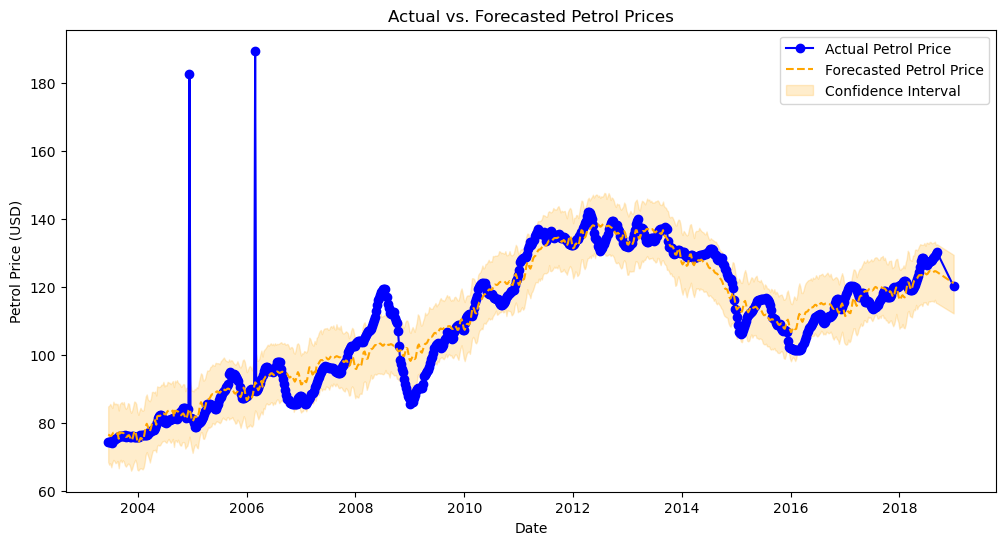

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual petrol prices
plt.plot(combined['date'], combined['petrol'], label='Actual Petrol Price', marker='o', color='blue')

# Plot forecasted petrol prices
plt.plot(combined['ds'], combined['yhat'], label='Forecasted Petrol Price', linestyle='--', color='orange')

# Add confidence intervals
plt.fill_between(combined['ds'], combined['yhat_lower'], combined['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')

# Add labels, title, and legend
plt.title('Actual vs. Forecasted Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(combined['petrol'], combined['yhat'])
rmse = np.sqrt(mean_squared_error(combined['petrol'], combined['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 3.79
RMSE: 6.72


In [49]:
# Rename columns to match Prophet's requirements
file.rename(columns={'date': 'ds', 'petrol': 'y'}, inplace=True)


In [53]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define a grid of hyperparameters to try (additive only)
param_grid = {
    'seasonality_prior_scale': [1, 5, 10],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'holidays_prior_scale': [1, 10],
}

best_model = None
best_mae = np.inf

# Perform grid search
for seasonality_scale in param_grid['seasonality_prior_scale']:
    for changepoint_scale in param_grid['changepoint_prior_scale']:
        for holidays_scale in param_grid['holidays_prior_scale']:
            # Initialize and train the model
            model = Prophet(
                seasonality_prior_scale=seasonality_scale,
                changepoint_prior_scale=changepoint_scale,
                holidays_prior_scale=holidays_scale,
                seasonality_mode='additive'  # Fixed to additive
            )
            model.fit(file)

            # Make future predictions
            future = model.make_future_dataframe(periods=365)
            forecast = model.predict(future)

            # Evaluate the model using MAE
            mae = mean_absolute_error(file['y'], forecast['yhat'][:len(file)])

            # Update best model if mae < best_mae
            if mae < best_mae:
                best_mae = mae
                best_model = model

# Output the best hyperparameters and model
print(f"Best MAE: {best_mae}")
print("Best Model:", best_model)


22:14:29 - cmdstanpy - INFO - Chain [1] start processing
22:14:30 - cmdstanpy - INFO - Chain [1] done processing
22:14:30 - cmdstanpy - INFO - Chain [1] start processing
22:14:31 - cmdstanpy - INFO - Chain [1] done processing
22:14:32 - cmdstanpy - INFO - Chain [1] start processing
22:14:32 - cmdstanpy - INFO - Chain [1] done processing
22:14:33 - cmdstanpy - INFO - Chain [1] start processing
22:14:33 - cmdstanpy - INFO - Chain [1] done processing
22:14:34 - cmdstanpy - INFO - Chain [1] start processing
22:14:36 - cmdstanpy - INFO - Chain [1] done processing
22:14:36 - cmdstanpy - INFO - Chain [1] start processing
22:14:38 - cmdstanpy - INFO - Chain [1] done processing
22:14:39 - cmdstanpy - INFO - Chain [1] start processing
22:14:40 - cmdstanpy - INFO - Chain [1] done processing
22:14:41 - cmdstanpy - INFO - Chain [1] start processing
22:14:41 - cmdstanpy - INFO - Chain [1] done processing
22:14:42 - cmdstanpy - INFO - Chain [1] start processing
22:14:43 - cmdstanpy - INFO - Chain [1]

Best MAE: 2.6511608843220933
Best Model: <prophet.forecaster.Prophet object at 0x0000020AB0835BB0>


In [55]:
import pickle

# Save the best model
with open('best_prophet_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'best_prophet_model.pkl'")


Model saved as 'best_prophet_model.pkl'
